In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [2]:
data = pd.read_csv('iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

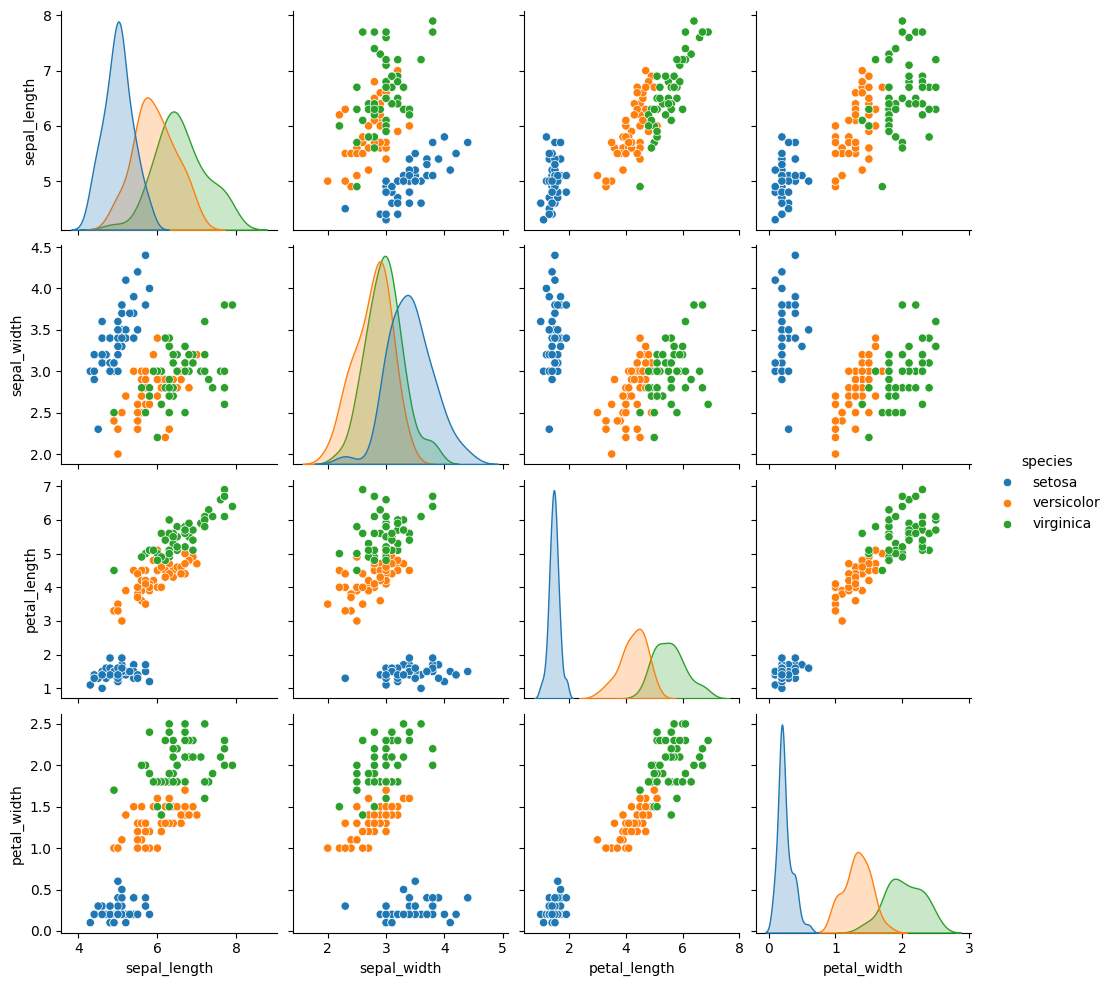

In [7]:
#visualizations
# pairplot to visualize relationship between features
sns.pairplot(data, hue="species")
plt.show()

## DATA PROCESSING

In [8]:
x = data.drop("species" , axis=1)
y = data["species"]
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [9]:
y_encoded = pd.factorize(y)[0]

In [10]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.25, random_state=42)

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## MODEL TRAINING

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train , y_train)

LogisticRegression(max_iter=1000)

## MODEL EVALUATION

In [14]:
y_pred = model.predict(x_test)


In [15]:
class_report = classification_report(y_test,y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [16]:
confusion_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(confusion_mat)

Confusion Matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


## VISUALIZATION

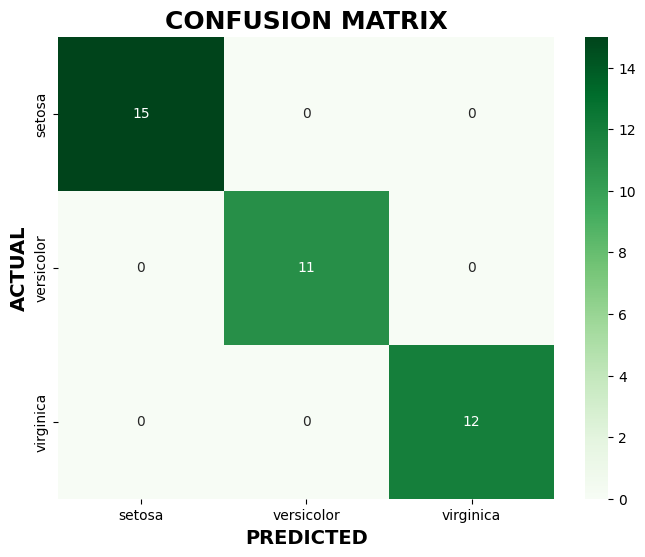

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_mat, annot=True, cmap='Greens', fmt='d', xticklabels=data["species"].unique(),
            yticklabels=data["species"].unique())
plt.title('CONFUSION MATRIX',fontweight='bold',fontsize=18)
plt.xlabel('PREDICTED',fontweight='bold',fontsize=14)
plt.ylabel('ACTUAL',fontweight='bold',fontsize=14)
plt.show()

In [18]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

In [19]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:,i],model.predict_proba(x_test)[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(f"class {i} AUC: {roc_auc[i]:.2f}")

class 0 AUC: 1.00
class 1 AUC: 1.00
class 2 AUC: 1.00


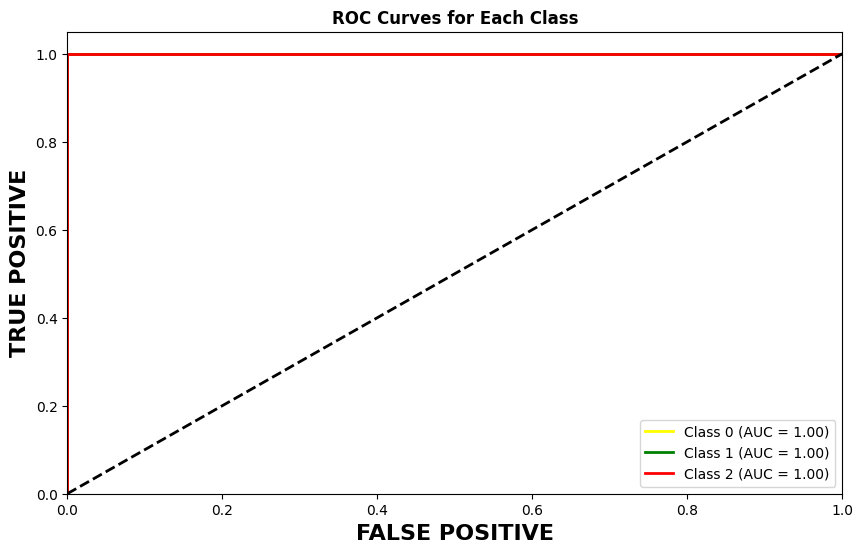

In [20]:
plt.figure(figsize=(10, 6))
colors = ['yellow', 'green', 'red']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE POSITIVE',fontweight='bold',fontsize=16)
plt.ylabel('TRUE POSITIVE',fontweight='bold',fontsize=16)
plt.title('ROC Curves for Each Class',fontweight='bold')
plt.legend(loc="lower right")
plt.show()

In [21]:
import joblib
# Save the trained model using joblib
joblib.dump(model, 'logistic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
model = joblib.load('logistic_model.pkl')
scaler = joblib.load('scaler.pkl')
input_data = np.array([[5.9, 3.0, 5.1, 1.8]])
input_data_scaled = scaler.transform(input_data)
prediction_encoded = model.predict(input_data_scaled)
print(prediction_encoded[0])
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
predicted_species = species_map[prediction_encoded[0]]
print(predicted_species)

2
virginica


In [24]:
# Custom function to make predictions with the saved model
def custom_predict(sepal_length, sepal_width, petal_length, petal_width):
    # Load the saved model and scaler
    model = joblib.load('logistic_model.pkl')
    scaler = joblib.load('scaler.pkl')

    # Prepare the input as a numpy array and scale it
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    input_data_scaled = scaler.transform(input_data)

    # Make the prediction
    prediction_encoded = model.predict(input_data_scaled)
    print("prediction_encoded",prediction_encoded)
    
    # Convert the encoded prediction back to the original species
    species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
    predicted_species = species_map[prediction_encoded[0]]
    
    return predicted_species

# Example usage of the custom prediction function
print(custom_predict(5.0, 3.5, 1.4, 0.2))  # Example input to predict species

prediction_encoded [0]
setosa
